# i Introduction

nama : Jovan Venly J Runturambi  
batch : 006   
dataset : amazon reviews for sentiment analysis  
source : kaggle

Hugging face : Deployment (https://huggingface.co/spaces/jovanvenly/grade_challenge7?logs=container)

Background : Dalam kasus ini, Saya seorang data scientist dan saya menginginkan informasi mengenai masalah kasus di perusahaan amazon untuk memahami tingkat kepuasan pelanggan dan dampak dari komentar terhadap produk di situs Amazon, menganalisis data review menggunakan Natural Language Processing (NLP) sangatlah penting. Dengan menerapkan teknik NLP, kita dapat menganalisis ulasan pelanggan untuk mengukur tingkat kepuasan berdasarkan sentimen yang terkandung dalam teks ulasan, serta mengevaluasi bagaimana komentar positif dan negatif mempengaruhi persepsi produk. Teknik ini memungkinkan kita untuk mengidentifikasi pola sentimen yang mendasari umpan balik pelanggan, memahami faktor-faktor yang berkontribusi terhadap kepuasan atau ketidakpuasan, dan mengukur dampak dari sentimen ulasan terhadap reputasi dan kesuksesan produk di pasar.

Objective : mengevaluasi tingkat kepuasan pelanggan dengan mengidentifikasi apakah ulasan mereka positif, negatif, atau netral. Selain itu, kami ingin memahami bagaimana komentar, baik positif maupun negatif, memengaruhi pandangan dan penilaian produk dalam proses `NLP`.

# ii. Import Libraries

In [2]:
# Import Libraries
import re
import os
import nltk
import string
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as tf_hub

from nltk.sentiment import SentimentIntensityAnalyzer # menganalisis teks ulasan dan komentar
from google.colab import files
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# iii. Data Loading

In [3]:
# download dataset
!kaggle datasets download -d tarkkaanko/amazon

Dataset URL: https://www.kaggle.com/datasets/tarkkaanko/amazon
License(s): CC-BY-NC-SA-4.0
  0% 0.00/582k [00:00<?, ?B/s]
100% 582k/582k [00:00<00:00, 17.4MB/s]


In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jovanvrunturambi","key":"d67606fc8a05725642f86b5cc102c6f6"}'}

In [5]:
# Pindahkan file kaggle.json ke direktori yang tepat
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Ubah izin file untuk keamanan
!chmod 600 ~/.kaggle/kaggle.json

# Verifikasi konfigurasi
!kaggle datasets list

ref                                                       title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset               📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          15417        321  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024         Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          11629        247  1.0              
ihelon/coffee-sales                                       Coffee Sales                                         10KB  2024-07-03 20:04:43           3661         65  1.0              
suchintikasarkar/sentiment-analysis-for-mental-health     Sentiment Analysis for Mental He

In [6]:
# Unduh dataset menggunakan URL dataset
!kaggle datasets download -d tarkkaanko/amazon

# Ekstrak file zip
!unzip amazon.zip

Dataset URL: https://www.kaggle.com/datasets/tarkkaanko/amazon
License(s): CC-BY-NC-SA-4.0
amazon.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  amazon.zip
  inflating: amazon_reviews.csv      


In [7]:
df = pd.read_csv('amazon_reviews.csv')

# Tampilkan beberapa baris pertama dari dataset
print(df.head())

   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

Kemudian saya akan menampilkan 10 data teratas dan 10 data terbawah.

In [8]:
# Menampilkan 10 data teratas
df.head(10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


In [9]:
# Menampilkan 10 data terbawah
df.tail(10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4905,4905,zht,5.0,So far so good. I use this with my mobil phone...,2012-12-28,710,0,0,0,0,0.0,0.0
4906,4906,Zigcarruse,5.0,it worked just like you would expect a micro S...,2014-02-13,298,0,0,0,0,0.0,0.0
4907,4907,Zim5,5.0,MicroSD card works flawlessly with my digital ...,2014-06-06,185,0,0,0,0,0.0,0.0
4908,4908,Zimms,5.0,"I really wanted a 128 GB card, but at less tha...",2014-12-05,3,0,0,0,0,0.0,0.0
4909,4909,Zman,5.0,I bought this to stretch the capability of my ...,2014-01-29,313,0,0,0,0,0.0,0.0
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0
4914,4914,Zza,5.0,I've heard bad things about this 64gb Micro SD...,2014-02-01,310,0,0,0,0,0.0,0.0


Selanjutnya saya akan mengecek informasi pada dataset.

In [10]:
# Cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


Informasi yang didapat diatas adalah:
1. Jumlah baris pada dataset 4915
2. Jumlah kolom pada dataset 12 kolom
4. Tidak terdapat data null

Kemudian saya akan mengcek missing value pada dataset.

In [11]:
# Cek missing value
df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [12]:
df = df[df['reviewerName'].notnull()]
df = df[df['reviewText'].notnull()]
# cek again, just to make sure
df.isnull().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

Lalu saya akan mengcek apakah ada data duplikat pada dataset.

In [13]:
# Cek duplikat data
df.duplicated().sum()

0

Tidak ada duplikat data pada dataset.

Setelah itu saya akan mengecek nama kolom pada dataset.

In [14]:
# Cek nama kolom
df.columns

Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

Kemudian saya akan mengecek jumlah unique value pada setiap kolom.

In [15]:
# Cek jumlah unique value
df.nunique()

Unnamed: 0              4913
reviewerName            4593
overall                    5
reviewText              4912
reviewTime               689
day_diff                 689
helpful_yes               23
helpful_no                17
total_vote                26
score_pos_neg_diff        27
score_average_rating      28
wilson_lower_bound        40
dtype: int64

melakukan ddf copy untuk dapat mempertahankan df yang sudah di cleaning

In [16]:
# create copy of dataframe
df_eda = df.copy()

# iv. Exploratory Data Analysis (EDA)

1. Overall Rating dari banyaknya Review

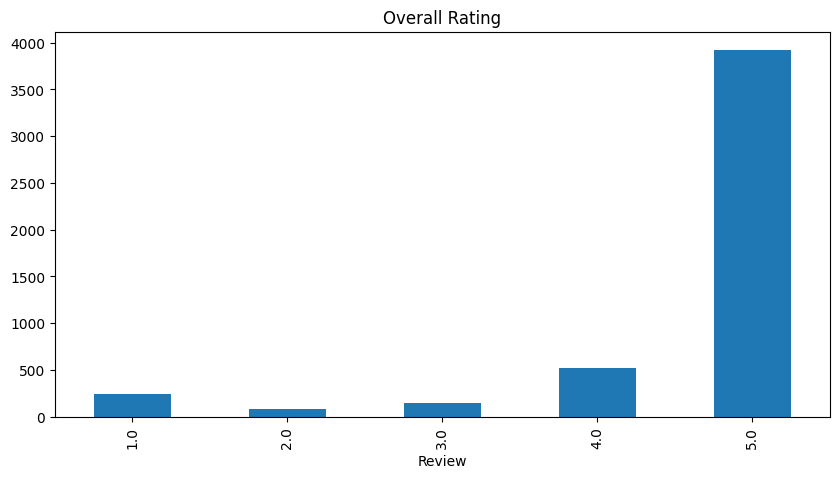

In [17]:
ad = df['overall'].value_counts().sort_index().plot(kind = 'bar', title = "Overall Rating", figsize = (10,5))
ad.set_xlabel("Review")
plt.show()

banyaknya orang melakukan pengambilan review diatas 5.0

2. Average Rating berdasarkan score avg rating yang memiliki banyaknya lebih dari 4000 avg rating

<Axes: title={'center': 'Avg. Rating'}, xlabel='score_average_rating'>

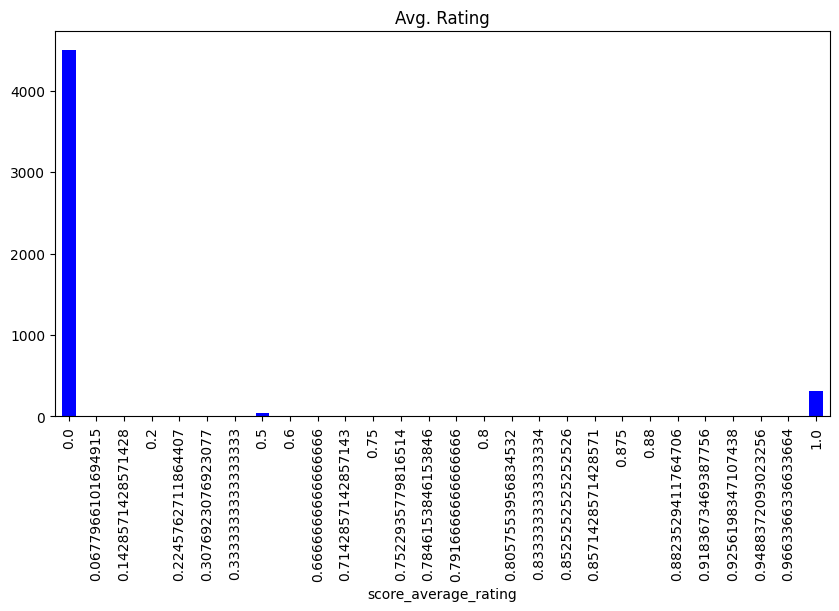

In [18]:
df['score_average_rating'].value_counts().sort_index().plot(kind = 'bar', title = "Avg. Rating", figsize = (10,5), color = 'blue')

Informasi dari graphic ini terdapat avg rating yang memiliki dominan lebih dari 4000 dan rata rata score 0.0 dan 1.0

3. nomor urutan yang memberikan evaluasi

<Axes: title={'center': 'Number of votes given to the evaluation'}, xlabel='total_vote'>

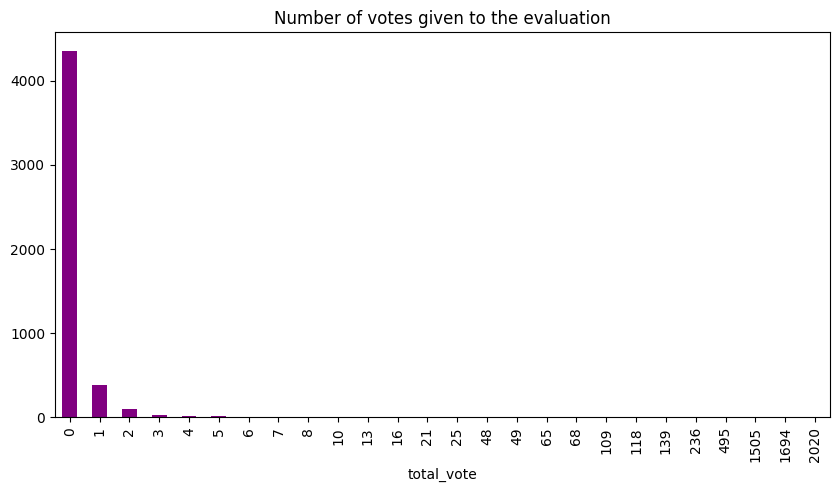

In [19]:
df['total_vote'].value_counts().sort_index().plot(kind = 'bar', title = 'Number of votes given to the evaluation', figsize = (10,5), color = 'purple')

lebih dari 4000 banyaknya jumlah evaluasi yang diberikan

4. Objective: Melihat kata-kata yang paling sering keluar pada OriginalAmazon

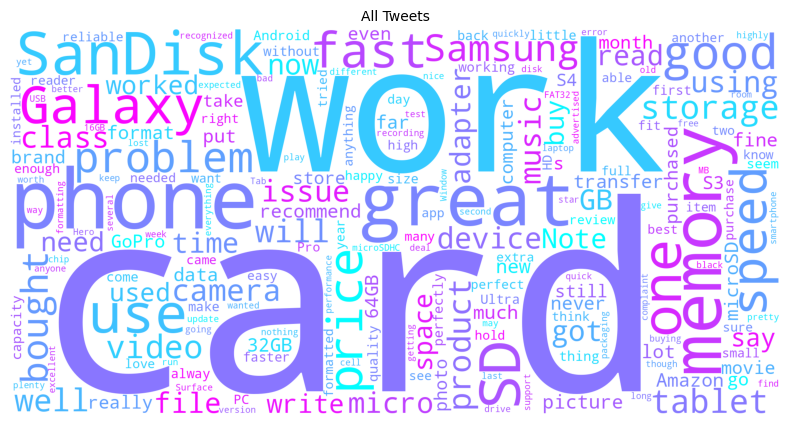

[('the', 8210), ('I', 7571), ('and', 7435), ('to', 6033), ('a', 5445), ('it', 5130), ('my', 4859), ('for', 3871), ('this', 3625), ('of', 3339)]


In [20]:
# Join all texts into a single string
text_all = " ".join(df['reviewText'].values)

# Create WordCloud
cloud_all = WordCloud(
    background_color='white',
    colormap="cool",
    collocations=False,
    width=2000,
    height=1000
).generate(text_all)

# Display WordCloud
plt.figure(figsize=(10,5))
plt.axis('off')
plt.title("All Tweets", fontsize=10)
plt.imshow(cloud_all)
plt.show()

# Tokenization and Word Frequency Count
words = text_all.split()
word_freq = Counter(words)

# Display the 10 most common words
print(word_freq.most_common(10))

Informasi diatas menunjukan bahwa kata-kata yang paling sering keluar yaitu CARD dan work, phone, memory,great, galaxy

5. Objective: Melihat kata-kata yang paling sering keluar pada sentiment `negative`, `neutral`, dan `positve`.

melihat penentuan kategorikal dalam satu kalimat apakah negatif, positif, atau netral

In [21]:
# Download VADER lexicon
nltk.download('vader_lexicon')

sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


contoh simple dalam kalimat ini

In [22]:
# Fungsi untuk mendapatkan label sentimen
def get_sentiment_label(text):
    score = sa.polarity_scores(text)["compound"]
    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "netral"

In [23]:
# Terapkan fungsi untuk mendapatkan label sentimen ke seluruh dataset
df["sentiment"] = df["reviewText"].apply(get_sentiment_label)

membuat visualisasi WordCloud untuk sentimen "negatif" dan "positif" dari review

disini saya ingin melihat keseluruhan kolom `review text` yang tergolong : negatif, netral, positif, dan compound. tapi sebelum itu saya ingin membuat kalimat2 pada kolom `review text` menjadi kapital untuk dapat mengetahui lebih jelas dalam menentukan kategori positif, netral, negatif atau comppound berdasarkan komentar.

In [24]:
df["reviewText"].apply(lambda x: x.upper())

1       PURCHASED THIS FOR MY DEVICE, IT WORKED AS ADV...
2       IT WORKS AS EXPECTED. I SHOULD HAVE SPRUNG FOR...
3       THIS THINK HAS WORKED OUT GREAT.HAD A DIFF. BR...
4       BOUGHT IT WITH RETAIL PACKAGING, ARRIVED LEGIT...
5       IT'S MINI STORAGE.  IT DOESN'T DO ANYTHING ELS...
                              ...                        
4910    I BOUGHT THIS SANDISK 16GB CLASS 10 TO USE WIT...
4911    USED THIS FOR EXTENDING THE CAPABILITIES OF MY...
4912    GREAT CARD THAT IS VERY FAST AND RELIABLE. IT ...
4913    GOOD AMOUNT OF SPACE FOR THE STUFF I WANT TO D...
4914    I'VE HEARD BAD THINGS ABOUT THIS 64GB MICRO SD...
Name: reviewText, Length: 4913, dtype: object

dengan begitu saya lakukan SentimentIntensityAnalyzer pada kalimat di kolom `review text`

In [25]:
df["reviewText"][0:10].apply(lambda x: sa.polarity_scores(x))

1     {'neg': 0.075, 'neu': 0.925, 'pos': 0.0, 'comp...
2     {'neg': 0.077, 'neu': 0.923, 'pos': 0.0, 'comp...
3     {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...
4     {'neg': 0.038, 'neu': 0.835, 'pos': 0.127, 'co...
5     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6     {'neg': 0.063, 'neu': 0.745, 'pos': 0.192, 'co...
7     {'neg': 0.044, 'neu': 0.833, 'pos': 0.123, 'co...
8     {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...
9     {'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'comp...
10    {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...
Name: reviewText, dtype: object

mengambil sentimen dari 10 ulasan pertama dalam kolom reviewText menggunakan `SentimentIntensityAnalyzer`. disini menghitung skor komposit sentimen dan menghasilkan seri dengan nilai-nilai dari skor komposit (compound) memberikan sentimen keseluruhan ulasan, apakah sentimen teks tersebut positif, netral, atau negatif.

In [26]:
df.groupby("sentiment")["overall"].mean()

sentiment
negatif    3.894616
netral     4.666667
positif    4.742926
Name: overall, dtype: float64

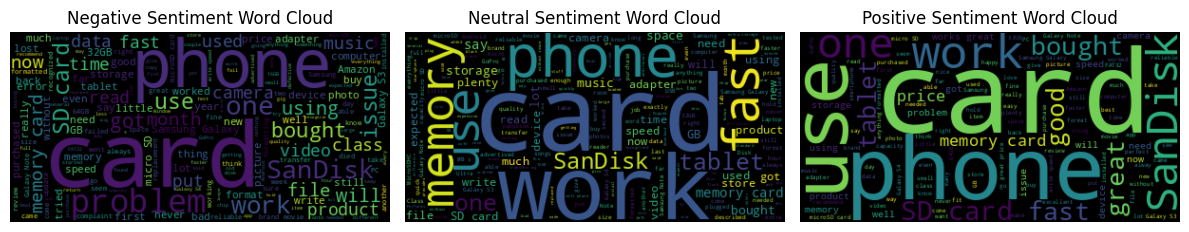

In [27]:
negative_text = ' '.join(df[df.sentiment == 'negatif'].reviewText.tolist())
neutral_text = ' '.join(df[df.sentiment == 'netral'].reviewText.tolist())
positive_text = ' '.join(df[df.sentiment == 'positif'].reviewText.tolist())

# Create WordCloud objects for each sentiment
negative_wordcloud = WordCloud().generate(negative_text)
neutral_wordcloud = WordCloud().generate(neutral_text)
positive_wordcloud = WordCloud().generate(positive_text)

# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(12, 8))

# Negative Word Cloud
plt.subplot(131)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(132)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment Word Cloud')
plt.axis('off')

# Positive Word Cloud
plt.subplot(133)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

Informasi diatas menunjukan bahwa:
- **Negative sentiment**: kata-kata yang paling sering keluar yaitu `card`, `problem`.
- **Neutral sentiment**: kata-kata yang paling sering keluar yaitu `card`, `work`.
- **Positve sentiment**: kata-kata yang paling sering keluar yaitu `card`, `phone`.

kata card memiliki dominasi besar dengan begitu kita perlu lebih memperjelas dengan detail melalui FE ini

# v. Feature Engineering

Sebelum melakukan text preprocessing saya akan menghapus kolom yang tidak akan saya pakai. dan kolom tidak saya butuhkan karena tidak memiliki korelasi besar untuk mendapatkan model terbaik dalam NLP

In [28]:
# Drop kolom
df.drop(['Unnamed: 0','helpful_yes', 'helpful_no','reviewTime','day_diff'], axis = 1, inplace = True)

# Menampilkan 5 Baris teratas setelah dilakukan drop kolom
df.head()

,reviewerName,overall,reviewText,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,sentiment
1,0mie,5.0,"Purchased this for my device, it worked as adv...",0,0,0.0,0.0,negatif
2,1K3,4.0,it works as expected. I should have sprung for...,0,0,0.0,0.0,negatif
3,1m2,5.0,This think has worked out great.Had a diff. br...,0,0,0.0,0.0,positif
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",0,0,0.0,0.0,positif
5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,0,0,0.0,0.0,netral


### v.i Text Preprocessing

Kemudian saya akan menghapus kata-kata yang tidak penting dari teks untuk meningkatkan efisiensi dan akurasi model pembelajaran mesin atau analisis teks lainnya.

In [29]:
# Show the stopwords downloaded
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
# Define Stopwords
stpwds_id = list(set(stopwords.words('english')))

# Add custom stopwords
custom_stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", ''
]
stpwds_id.extend(custom_stopwords)

# Define Stemming
stemmer = PorterStemmer()

Selanjutnya saya akan  mengimplementasikan serangkaian tahapan pra-pemrosesan teks, termasuk pengubahan ke huruf kecil, penghapusan URL, hashtag, angka, karakter non-huruf, serta tokenisasi, penghapusan stopwords, stemming, dan penggabungan kembali token untuk mempersiapkan teks untuk analisis lebih lanjut.

In [31]:
# Create A Function for Text Preprocessing
def text_preprocessing(text):
    # Case folding
    text = text.lower()

    # Mention removal
    text = re.sub(r'https?://(?:www\.[^\s\n\r]+|[^\s\n\r]+)', '', text)

    # Hashtags removal
    text = re.sub(r'#', '', text)

    # Newline removal (\n)
    text = re.sub(r'[\n\r]', '', text)

    # Replaces the numbers with an empty string
    text = re.sub(r'\d+', '', text)

    # Whitespace removal
    text = text.strip()

    # URL removal
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"www.\S+", " ", text)

    # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc.)
    text = re.sub("[^A-Za-z\s']", " ", text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopwords removal
    tokens = [word for word in tokens if word not in stpwds_id]

    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Combining Tokens
    text = ' '.join(tokens)

    return text

Setelah itu saya kita masuk dalam tahap preprocessing

In [32]:

# Applying Text Preprocessing to the Dataset
df['tweet_processed'] = df['reviewText'].apply(lambda x: text_preprocessing(x))
df.head(2)

,reviewerName,overall,reviewText,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,sentiment,tweet_processed
1,0mie,5.0,"Purchased this for my device, it worked as adv...",0,0,0.0,0.0,negatif,purchas devic work advertis never much phone m...
2,1K3,4.0,it works as expected. I should have sprung for...,0,0,0.0,0.0,negatif,work expect sprung higher capac think made bit...


### v.ii Target Conversion

Pada proses ini saya akan mengkonversikan variabel target (Sentiment) kedalam bentuk numerik.

In [33]:
# Display Target
df.sentiment.unique()

array(['negatif', 'positif', 'netral'], dtype=object)

Setelah mengkonversi variabel target saya akan memasukannya kedalam kolom baru (label).

In [34]:
# Change Target into Number
df['label'] = df['sentiment'].replace({'netral' : 0, 'positif' : 1, 'negatif' : 2})
df

,reviewerName,overall,reviewText,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,sentiment,tweet_processed,label
1,0mie,5.0,"Purchased this for my device, it worked as adv...",0,0,0.0,0.0,negatif,purchas devic work advertis never much phone m...,2
2,1K3,4.0,it works as expected. I should have sprung for...,0,0,0.0,0.0,negatif,work expect sprung higher capac think made bit...,2
3,1m2,5.0,This think has worked out great.Had a diff. br...,0,0,0.0,0.0,positif,think work great diff bran gb card went south ...,1
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",0,0,0.0,0.0,positif,bought retail packag arriv legit orang envelop...,1
5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,0,0,0.0,0.0,netral,'s mini storag n't anyth els 's suppos purchas...,0
...,...,...,...,...,...,...,...,...,...,...
4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,0,0,0.0,0.0,positif,bought sandisk gb class use htc inspir month g...,1
4911,Zo,5.0,Used this for extending the capabilities of my...,0,0,0.0,0.0,positif,use extend capabl samsung galaxi note greatli ...,1
4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,0,0,0.0,0.0,positif,great card fast reliabl come option adapt sd s...,1
4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,0,0,0.0,0.0,positif,good amount space stuff want fit gopro say,1


Lalu saya akan melihat distribusi label pada variabel target.

In [35]:
# Target Distribution
df['label'].value_counts()

label
1    3746
2     873
0     294
Name: count, dtype: int64

### v.iii Data Splitting

Saya akan memisahkan variabel feature dan variable target, untuk dilakukan vectorization dan embeding pada variabel feature.

In [36]:
# Splitting between `X` and `y`
X = df.drop('sentiment', axis=1)
y = df['sentiment']

Kemudian saya akan memisahkan variabel X dan y menjadi 3 bagian train, val, dan test. val atau validation dibuat bertujuan untuk memantau performa model pada data yang tidak terlihat selama pelatihan. Hal ini membantu memastikan bahwa model tidak hanya menghafal data pelatihan (overfitting), tetapi juga mampu melakukan generalisasi pada data baru.

In [37]:
# Data Splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(df.tweet_processed,
                                                    df.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (3758,)
Val Size   :  (418,)
Test Size  :  (737,)


Lalu saya akan melakukan one hot encoding pada variabel y.

In [38]:
# Change Target to One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

### v.iv Handling Missing Value

Pada proses ini saya sudah melakukan cek missing value pada tahap data cleaning

### v.v Text Vectorization

Pada proses text vectorization saya akan mengubah data teks mentah menjadi representasi numerik yang dapat diproses oleh model deep learning. Vectorization sangat penting karena model deep learning hanya dapat menangani input numerik, bukan data teks mentah.

Pertama saya akan menggunakan CountVectorizer untuk mengubah teks mentah dari data pelatihan dan pengujian menjadi representasi numerik dalam bentuk matriks sparse dokumen-term yang dapat digunakan dalam model deep learning.

In [39]:
# Get Vocabularies
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<3758x4682 sparse matrix of type '<class 'numpy.int64'>'
	with 80138 stored elements in Compressed Sparse Row format>

Kemudian saya akan menghitung jumlah total kata unik (kosakata) dan panjang kalimat maksimum dalam data pelatihan, kemudian mencetak hasilnya.

In [40]:
# Finding the Number of Vocabs and Max Token Length in One Document
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  4682
Maximum Sentence Length :  800 tokens


Terdapat Total Vocab 32268 dan Maximum Sentence Length 47 tokens pada variabel X_train.

Lalu saya akan menggunakan TextVectorization untuk mengubah teks mentah dari data pelatihan menjadi representasi numerik dengan parameter yang ditentukan, termasuk pengaturan untuk normalisasi teks, tokenisasi, dan panjang output, lalu menyesuaikan lapisan tersebut dengan data pelatihan.

In [41]:
# Parameters for TextVectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

Setelah itu saya akan menampilkan contoh dokumen yang telah diproses, hasil vektorisasi teks dari contoh dokumen tersebut, dan ukuran vektor yang dihasilkan.

In [42]:
# Document example
print('Document example')
print(df.tweet_processed[1])
print('')

# Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df.tweet_processed[1]]))
print('Vector size : ', text_vectorization([df.tweet_processed[1]]).shape)

Document example
purchas devic work advertis never much phone memori sinc download lot stuff brainer

Result of Text Vectorization
tf.Tensor(
[[ 42  38   3 208  64  55   5   9 100 199  56 248 878   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   

Kemudian saya akan menampilkan 20 kata pertama dari kosakata yang dipelajari oleh objek text_vectorization selama proses pelatihan teks.

In [43]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'card',
 'work',
 'use',
 'phone',
 'gb',
 'great',
 'nt',
 'memori',
 'sandisk',
 's',
 'sd',
 'one',
 'galaxi',
 'price',
 'speed',
 'fast',
 'samsung',
 'good']

### v.vi Word Embedding

Dalam proses word embedding, saya akan merepresentasikan kata-kata sebagai angka-angka, yang memungkinkan komputer memahami makna kata-kata berdasarkan konteks penggunaannya dalam pemrosesan bahasa alami (NLP). Pertama, saya akan menambahkan layer embedding ke dalam model neural network untuk NLP. Layer ini akan memiliki jumlah neuron input sesuai dengan total vocabulary, dimensi output neuron sebesar 128, bobot yang diinisialisasi menggunakan metode uniform, dan panjang input yang diharapkan untuk setiap kalimat adalah max_sen_len.

In [44]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

Lalu saya akan mencetak teks dari dokumen yang telah diproses, menghasilkan representasi vektor teks setelah dilakukan vectorization, dan kemudian menghasilkan embedding vektor dari representasi tersebut.

In [45]:
# Document example
print('Document example')
print(df.tweet_processed[1])
print('')

# Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df.tweet_processed[1]]))
print('Vector size : ', text_vectorization([df.tweet_processed[1]]).shape)
print('')

# Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df.tweet_processed[1]])))
print('Vector size : ', embedding(text_vectorization([df.tweet_processed[1]])).shape)

Document example
purchas devic work advertis never much phone memori sinc download lot stuff brainer

Result of  Text Vectorization
tf.Tensor(
[[ 42  38   3 208  64  55   5   9 100 199  56 248 878   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0  

# vi. ANN Training (Sequential API)

proses pelatihan (ANN) menggunakan Sequential API melibatkan lapisan neural berurutan, kompilasi model dengan fungsi loss dan optimizer yang sesuai,melatih model menggunakan data training dan bobot melalui iterasi berbasis backpropagation..

## vi. 1. Model Definition

melakukan training model menggunakan LTSM yang merupakan jaringan neural berurutan untuk memproses teks, diikuti oleh lima lapisan LSTM tanpa bidirectional dengan ukuran neuron yang menurun secara bertahap (128, 64, 32, 16, dan 8) masing-masing dengan initializer GlorotUniform dan dropout 0.1, juga  Dense, 3 neuron output dan fungsi aktivasi softmax untuk klasifikasi multikelas.

In [46]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
tf.random.set_seed(seed)

# Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(text_vectorization)  # Assuming this is a layer for text vectorization
model_lstm_2.add(embedding)  # Assuming this is your embedding layer

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

# LSTM layer without Bidirectional
model_lstm_2.add(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.1))

model_lstm_2.add(Dense(3, activation='softmax'))

Selanjutnya saya akan menampilkan diagram visual dari arsitektur model model_lstm_2, dengan bentuk (shapes) dari setiap lapisan.

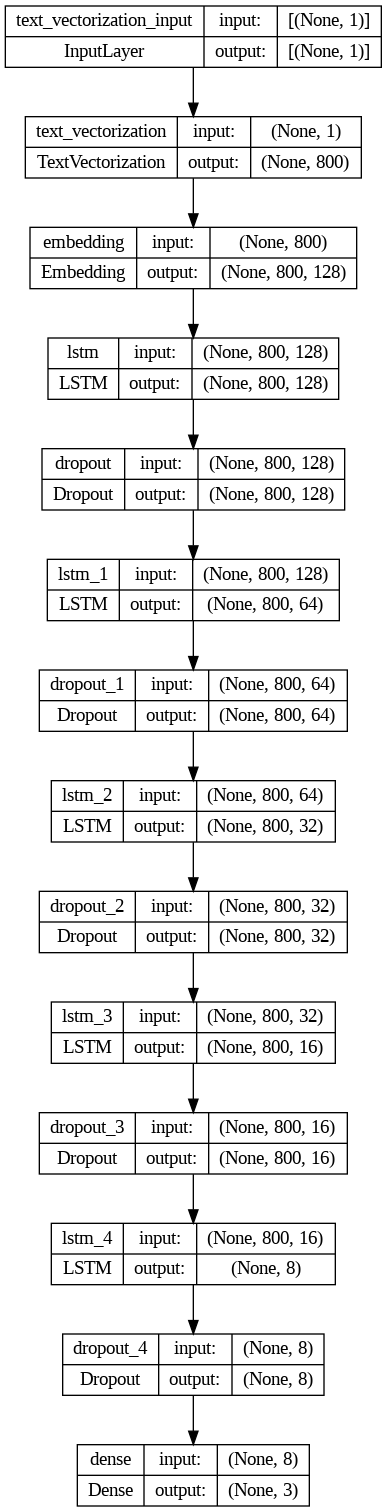

In [47]:
# Plot Layers
tf.keras.utils.plot_model(model_lstm_2, show_shapes=True)

### vi. 2. Model Training

Kemudian saya akan melakukan training dengan model LSTM dengan loss function  categorical_crossentropy, optimizer adam, dan metrik accuracy

In [ ]:
%%time

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=50,
                                      validation_data=(X_val, y_val_ohe),
                                      callbacks=[early_stopping])

Epoch 1/50
118/118 [==============================] - 444s 4s/step - loss: 0.7249 - accuracy: 0.7600 - val_loss: 0.6824 - val_accuracy: 0.7632
Epoch 2/50
118/118 [==============================] - ETA: 0s - loss: 0.6900 - accuracy: 0.7624

Dari hasil training model mendapatkan hasil akhir accuracy score 0.76 dan val_accuracy score 0.76 dengan waktu running model selama 1 27min 11 s.

 hasil pelatihan model LSTM, dengan dua subplot yang menunjukkan perubahan akurasi dan kehilangan (loss) selama pelatihan untuk data pelatihan dan validasi, membantu kinerjanya dan apakah overfitting atau underfitting.

In [ ]:
# Plot Training Results
model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

# vii. ANN Improvement (Sequential API)

 hasil dari training model teridentifikasi overfitting, saya akan melakukan model improvement untuk menyempurnakan model ANN secara bertahap dengan menambahkan atau mengurangi lapisan secara berurutan

### vii.1. Model Definition

Untuk meningkatkan model LSTM saya akan mencoba mengurangi lapisan yang terdiri dari lapisan text vectorization dan embedding diikuti oleh dua lapisan LSTM berurutan dengan 64 dan 32 unit masing-masing, menggunakan kernel initializer GlorotUniform dengan regularisasi L2, dan dropout 20%, serta lapisan output Dense dengan 3 unit dan fungsi aktivasi softmax untuk klasifikasi multikelas.

In [ ]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
tf.random.set_seed(seed)

# Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)  # Assuming this is a layer for text vectorization
model_lstm_1.add(embedding)  # Assuming this is your embedding layer

# LSTM layer without Bidirectional
model_lstm_1.add(LSTM(64, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                      kernel_regularizer=l2(0.01)))  # Add L2 regularization
model_lstm_1.add(Dropout(0.2))

# LSTM layer without Bidirectional
model_lstm_1.add(LSTM(32, kernel_initializer=tf.keras.initializers.GlorotUniform(seed),
                      kernel_regularizer=l2(0.01)))  # Add L2 regularization
model_lstm_1.add(Dropout(0.2))

model_lstm_1.add(Dense(3, activation='softmax'))

Selanjutnya saya akan menampilkan diagram visual dari improvement dengan arsitektur model model_lstm_1, dengan bentuk (shapes) dari setiap lapisan.

In [ ]:
# Plot Layers
tf.keras.utils.plot_model(model_lstm_1, show_shapes=True)

### vii.2. Model Training

melakukan training improvement model dengan model LSTM dengan loss function  categorical_crossentropy, optimizer adam, dan metrik accuracy, dan juga melatih model menggunakan data pelatihan dengan callback EarlyStopping yang memonitor val_loss juga mengembalikan bobot terbaik berdasarkan performa validasi.

In [ ]:
%%time

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with EarlyStopping
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=50,
                                      validation_data=(X_val, y_val_ohe),
                                      callbacks=[early_stopping])

In [ ]:
# Plot Training Results
model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Dari hasil lineplot improvement model dapat belum semaksimal untuk disimpulkan bahwa kinerja model berubah menjadi goodfit sampai epoch 1, walaupun setelah itu mengalami overfitting.

### vii.3. Model Evaluation

Pada proses model evaluation saya akan melakukan


classification report dengan model yang saya pakai yaitu  model improvement `model_lstm_1`.

In [ ]:
# frezze model
model_lstm_1.trainable = False

# Model Summary
model_lstm_1.summary()

Kemudian saya akan memprediksi probabilitas untuk setiap kelas menggunakan model model_lstm_1 pada data pelatihan X_train, menentukan label kelas yang diprediksi dengan mengambil argmax di sepanjang sumbu terakhir dari probabilitas yang diprediksi, dan kemudian menghasilkan laporan klasifikasi yang merinci metrik evaluasi seperti precision, recall, F1-score, dan support untuk masing-masing kelas berdasarkan label sebenarnya y_train dan label yang diprediksi.

In [ ]:
# Predict probabilities for each class
y_pred_seq_train_probs = model_lstm_1.predict(X_train)

# Get the predicted class labels (argmax along the last axis)
y_pred_seq_train = np.argmax(y_pred_seq_train_probs, axis=1)

# Classification report
print(classification_report(y_train, y_pred_seq_train))

Lalu saya akan memprediksi probabilitas menghasilkan laporan klasifikasi yang membandingkan label prediksi dengan label sebenarnya y_test untuk mengevaluasi kinerja model.

In [ ]:
# Predict probabilities for each class
y_pred_seq_test_probs = model_lstm_1.predict(X_test)

# Get the predicted class labels (argmax along the last axis)
y_pred_seq_test = np.argmax(y_pred_seq_test_probs, axis=1)

# Classification report
print(classification_report(y_test, y_pred_seq_test))

Model pada test memiliki akurasi yang baik, beberapa kelas menunjukkan performa yang sangat baik dalam hal recall (Class 1) dan precision (Class 2). Model tampaknya tidak overfit karena metrik evaluasi seperti precision, recall, dan F1-score menunjukkan konsistensi performa yang baik di seluruh kelas.

# viii. Model Saving

Dan setelah mendapatkan model terbaik saya akan menyimpan model tersebut untuk dilakukan proses inference.

In [ ]:
# Save the model
model_lstm_1.save('model_ltsm_1')

# Directory name of model name
model_dir = 'model_ltsm_1'

# Save model as TensorFlow SavedModel
model_lstm_1.save(model_dir, save_format='tf')

Download model dalam bentuk folder zip.

In [ ]:
# Compress the folder
!zip -r model_ltsm1.zip model_ltsm1

# Download the compressed folder
files.download('model_ltsm1.zip')

# ix. Model Inference

 notebook `P2G7_Jovan_Venly_Inference.ipynb`

# x. Pengambilan Kesimpulan

**Accuracy:** diklasifikasikan dengan baik; mendapatkan gambaran umum kinerja model.  
**Precision:** diklasifikasikan sebagai positif ( negatif) yang benar-benar positif (negatif).  
**Recall:** Persentase relevan penting untuk memastikan tidak ada terlewat dalam analisis.
**F1-Score:** rata-rata dari precision dan recall; deteksi sentimen yang relevan, terutama dalam pengambilan keputusan bisnis.  
metrik membantu memahami bagaimana model prediksi sentimen

### kekurangan dan kelebihan




4. Insight EDA:
- overall rating dari banyaknya reviews
- Average Rating berdasarkan score avg rating yang memiliki banyaknya lebih dari 4000 avg rating
- distribusi jumlah suara yang diberikan dalam evaluasi.
- Melihat kata-kata yang paling sering keluar pada OriginalAmazon.
- kata-kata yang paling sering keluar pada sentiment `negative`, `neutral`, dan `positve`.